In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

We need 12 min states. So let's define a 4x4 grid having 16 states.

In [2]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self, observation_space, action_space, max_timesteps):
    self.observation_space = spaces.Discrete(observation_space)
    self.action_space = spaces.Discrete(action_space)
    self.max_timesteps = max_timesteps
    self.rewards = np.array([[0, 1, 1, 1],
            [1, -1, -1, 1],
            [1, -1, -1, 1],
            [1, 1, 1, 2]])

  def reset(self):
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.goal_pos = [3, 3]
    self.state = np.zeros((4, 4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()
    return observation

  def step(self, action):

    if action == 0: # Go left
      self.agent_pos[0] -= 1
    if action == 1: # Go up
      self.agent_pos[1] -= 1
    if action == 2: # Go right
      self.agent_pos[0] += 1
    if action == 3: # Go down
      self.agent_pos[1] += 1
    
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    self.state = np.zeros((4,4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    reward = self.rewards[tuple(self.agent_pos)]

    self.timestep += 1
    done = True if self.timestep >= self.max_timesteps or list(self.agent_pos) == self.goal_pos else False
    info = {}

    return observation, reward, done, info

  def render(self):
    plt.figure()
    plt.imshow(self.state)

Lets initialize our environment with the following parameters ⬇️ :
- observation_space = 16 Discrete
- action_space = 4 (Left = 0, Up = 1, Right = 2, Down = 3)
- max_timesteps = 10

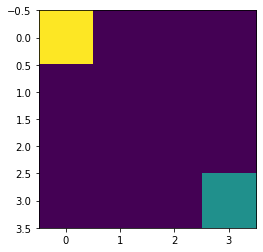

In [3]:
observation_space = 16
action_space = 4
max_timesteps = 10

env = GridEnvironment(observation_space, action_space, max_timesteps)
obs = env.reset()
env.render()

The following function will select a random action in a deterministic 🔥 fashion 

In [4]:
def get_action_deterministic(action_space_n):
    return np.random.choice(action_space_n)

The following function will select an action in a stochastic 🤔 fashion

In [5]:
def get_action_stochastic():

    direction_probabilities = {
        np.random.uniform(0, 0.09): 0,
        np.random.uniform(0, 0.09): 1,
        np.random.uniform(0.1, 1): 2,
        np.random.uniform(0.1, 1): 3
    }

    max_probability = max(direction_probabilities.keys())
    max_action = direction_probabilities[max_probability]

    action = max_action - 2 if max_probability < 0.3 else max_action

    return action


Let's run the agent in a deterministic environment ⬇️

In [6]:
def run_agent_and_generate_results(DETERMINISTIC = True):
    rewards_sum = 0
    data_cell = []
    col_headers = ['TimeStep', 'Action', 'Reward', 'Total Rewards', 'Done']
    for timestep in range(0,env.max_timesteps):
        action = get_action_deterministic(env.action_space.n) if DETERMINISTIC else get_action_stochastic()
        observation, reward, done, _ = env.step(action)
        rewards_sum += reward
        data_cell.append([timestep, action, reward, rewards_sum, done])
        env.render()
        if done:
            break

    plt.subplot(212)
    plt.axis('off')
    plt.table(cellText=data_cell, colLabels=col_headers)


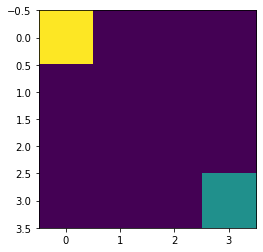

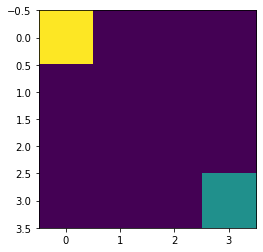

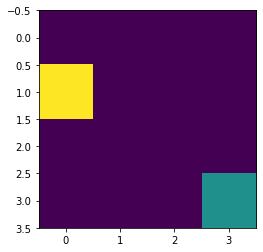

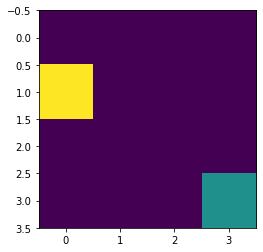

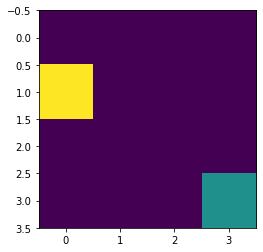

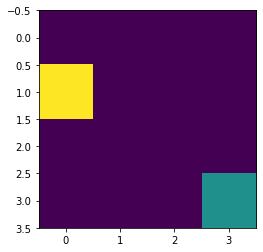

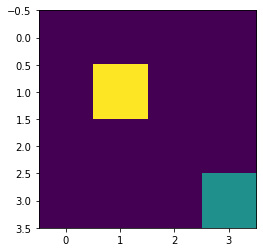

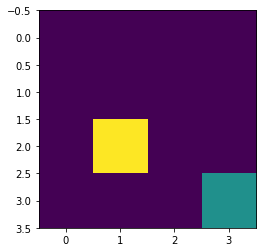

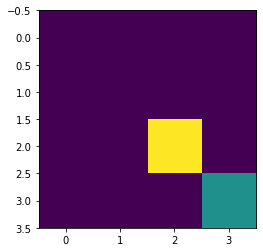

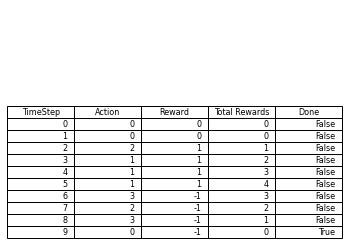

In [7]:
env.reset()
run_agent_and_generate_results(DETERMINISTIC=True)

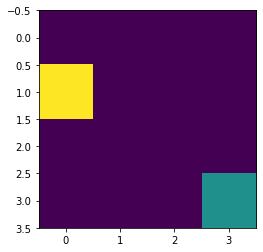

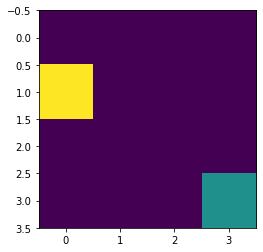

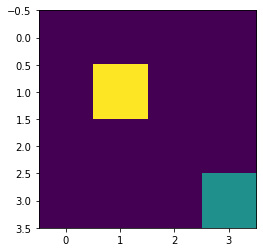

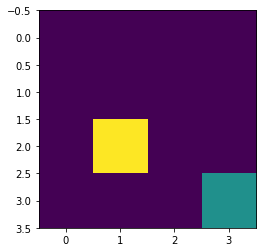

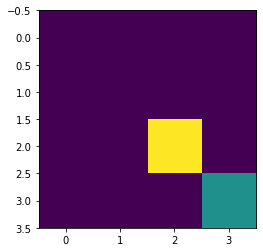

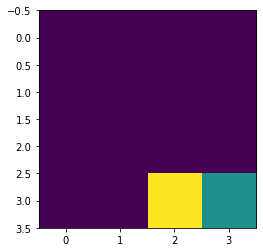

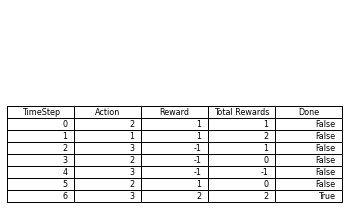

In [8]:
env.reset()
run_agent_and_generate_results(DETERMINISTIC=False)